# **Symptom Data Parser and Visualizer**

Step 1: Create a Parser Program
This program will:

Read the dataset from  file (dataset1.csv).
Create a dictionary of symptoms and store it in memory.

In [6]:
from google.colab import files


uploaded = files.upload()


Saving dataset1.csv to dataset1 (1).csv


In [15]:
file_path = next(iter(uploaded))

In [14]:

from google.colab import files
import json
import xml.etree.ElementTree as ET

In [8]:
import pandas as pd

# Use the exact filename you found from the directory listing
df = pd.read_csv('dataset1 (1).csv')

# Display the DataFrame to confirm it's loaded correctly
print("Dataset loaded successfully:")
print(df.head())


Dataset loaded successfully:
   rNo Patient_Id         DOB Fever Cough  Cold Other Symptoms       City  \
0    1     COVID1  11-05-1985  High   Low  High      Body Ache     Mumbai   
1    2     COVID2  12-05-1947   Mid   Low   Mid      Shivering  Bengaluru   
2    3     COVID3  13-05-1999   Low   Mid   Low      Head Ache    Chennai   
3    4     COVID4  14-05-1985  High  High   Low         Nausea    Kolkata   
4    5     COVID5  15-05-1984   Mid   Mid  High       Sickness  Hyderabad   

         State Country  Pincode         Time Period  
0  Maharashtra   India   400001             Morning  
1    Karnataka   India   560001           Afternoon  
2   Tamil Nadu   India   600001  Throughout the day  
3  West Bengal   India   700001             Evening  
4    Telangana   India   500001               Night  


In [9]:

# Step 2: Create a dictionary to store symptoms and attributes
symptom_dict = {}

# Iterating over the DataFrame to extract symptoms and their attributes
for index, row in df.iterrows():
    patient_id = row['Patient_Id']

    # Adding symptoms to the dictionary
    symptom_dict[patient_id] = {
        'Fever': row['Fever'],
        'Cough': row['Cough'],
        'Cold': row['Cold'],
        'Other Symptoms': row['Other Symptoms'],
        'City': row['City'],
        'State': row['State'],
        'Country': row['Country'],
        'Pincode': row['Pincode'],
        'Time Period': row['Time Period']
    }

# Dictionary in memory for reference
print("Dictionary created from dataset:")
print(symptom_dict)


Dictionary created from dataset:
{'COVID1': {'Fever': 'High', 'Cough': 'Low', 'Cold': 'High', 'Other Symptoms': 'Body Ache', 'City': 'Mumbai', 'State': 'Maharashtra', 'Country': 'India', 'Pincode': 400001, 'Time Period': 'Morning'}, 'COVID2': {'Fever': 'Mid', 'Cough': 'Low', 'Cold': 'Mid', 'Other Symptoms': 'Shivering', 'City': 'Bengaluru', 'State': 'Karnataka', 'Country': 'India', 'Pincode': 560001, 'Time Period': 'Afternoon'}, 'COVID3': {'Fever': 'Low', 'Cough': 'Mid', 'Cold': 'Low', 'Other Symptoms': 'Head Ache', 'City': 'Chennai', 'State': 'Tamil Nadu', 'Country': 'India', 'Pincode': 600001, 'Time Period': 'Throughout the day'}, 'COVID4': {'Fever': 'High', 'Cough': 'High', 'Cold': 'Low', 'Other Symptoms': 'Nausea', 'City': 'Kolkata', 'State': 'West Bengal', 'Country': 'India', 'Pincode': 700001, 'Time Period': 'Evening'}, 'COVID5': {'Fever': 'Mid', 'Cough': 'Mid', 'Cold': 'High', 'Other Symptoms': 'Sickness', 'City': 'Hyderabad', 'State': 'Telangana', 'Country': 'India', 'Pincode':

Step 2: Print the Loss (Columns Not Found)
You can check if all columns are found and report any missing data.

In [10]:
# Step 3: Checking for missing columns (loss)
expected_columns = ['rNo', 'Patient_Id', 'DOB', 'Fever', 'Cough', 'Cold', 'Other Symptoms', 'City', 'State', 'Country', 'Pincode', 'Time Period']
missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("No columns missing. All columns are present.")


No columns missing. All columns are present.


Step 3: Enhance the Dictionary with New Data
We will read the dataset again and update the dictionary if any new symptoms or information are found in the dataset.


In [11]:
# Step 4: Enhance the dictionary with new symptoms found in 'Other Symptoms'
for index, row in df.iterrows():
    patient_id = row['Patient_Id']

    if patient_id in symptom_dict:
        # Enhance dictionary with any new symptoms from "Other Symptoms" column
        new_symptom = row['Other Symptoms']
        if new_symptom not in symptom_dict[patient_id].values():
            symptom_dict[patient_id]['Other Symptoms'] += f", {new_symptom}"

print("Enhanced dictionary:")
print(symptom_dict)


Enhanced dictionary:
{'COVID1': {'Fever': 'High', 'Cough': 'Low', 'Cold': 'High', 'Other Symptoms': 'Body Ache', 'City': 'Mumbai', 'State': 'Maharashtra', 'Country': 'India', 'Pincode': 400001, 'Time Period': 'Morning'}, 'COVID2': {'Fever': 'Mid', 'Cough': 'Low', 'Cold': 'Mid', 'Other Symptoms': 'Shivering', 'City': 'Bengaluru', 'State': 'Karnataka', 'Country': 'India', 'Pincode': 560001, 'Time Period': 'Afternoon'}, 'COVID3': {'Fever': 'Low', 'Cough': 'Mid', 'Cold': 'Low', 'Other Symptoms': 'Head Ache', 'City': 'Chennai', 'State': 'Tamil Nadu', 'Country': 'India', 'Pincode': 600001, 'Time Period': 'Throughout the day'}, 'COVID4': {'Fever': 'High', 'Cough': 'High', 'Cold': 'Low', 'Other Symptoms': 'Nausea', 'City': 'Kolkata', 'State': 'West Bengal', 'Country': 'India', 'Pincode': 700001, 'Time Period': 'Evening'}, 'COVID5': {'Fever': 'Mid', 'Cough': 'Mid', 'Cold': 'High', 'Other Symptoms': 'Sickness', 'City': 'Hyderabad', 'State': 'Telangana', 'Country': 'India', 'Pincode': 500001, 'Ti

Step 4: Attach Attributes and Ensure Loss of Attributes is 0
We'll define attributes and ensure no attributes are missing.

In [12]:
# Step 5: Attach attributes (e.g., severity levels)
for patient_id in symptom_dict:
    symptom_dict[patient_id]['Fever Severity'] = symptom_dict[patient_id]['Fever']  # Example of attaching attribute
    symptom_dict[patient_id]['Cough Severity'] = symptom_dict[patient_id]['Cough']

# Ensure no loss of attributes (all columns are accounted for)
attributes_missing = any(col not in symptom_dict[patient_id] for col in ['Fever Severity', 'Cough Severity'])

if not attributes_missing:
    print("No attribute loss. All symptoms have attached attributes.")
else:
    print("Some attributes are missing.")


No attribute loss. All symptoms have attached attributes.


Step 5: Make the Parser Able to Read Multiple Formats (CSV, TSV, JSON, XML)
Extend the parser to handle multiple file formats using appropriate libraries.

In [16]:
def read_file(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.tsv'):
        return pd.read_csv(file_path, delimiter='\t')
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    elif file_path.endswith('.xml'):
        tree = ET.parse(file_path)
        root = tree.getroot()
        data = []
        for child in root:
            row_data = {}
            for sub_child in child:
                row_data[sub_child.tag] = sub_child.text
            data.append(row_data)
        return pd.DataFrame(data)
    else:
        raise ValueError("Unsupported file format")

Step 6: Dump the Dictionary to a File and Allow Manual Editing
This allows dumping the dictionary and reloading it after manual editing.

In [17]:
import json

# Step 6: Dump the dictionary to a JSON file
with open('symptom_dict.json', 'w') as json_file:
    json.dump(symptom_dict, json_file, indent=4)

# Step 7: Reload and reparse the dictionary
with open('symptom_dict.json', 'r') as json_file:
    loaded_dict = json.load(json_file)

print("Loaded dictionary from file:")
print(loaded_dict)


Loaded dictionary from file:
{'COVID1': {'Fever': 'High', 'Cough': 'Low', 'Cold': 'High', 'Other Symptoms': 'Body Ache', 'City': 'Mumbai', 'State': 'Maharashtra', 'Country': 'India', 'Pincode': 400001, 'Time Period': 'Morning', 'Fever Severity': 'High', 'Cough Severity': 'Low'}, 'COVID2': {'Fever': 'Mid', 'Cough': 'Low', 'Cold': 'Mid', 'Other Symptoms': 'Shivering', 'City': 'Bengaluru', 'State': 'Karnataka', 'Country': 'India', 'Pincode': 560001, 'Time Period': 'Afternoon', 'Fever Severity': 'Mid', 'Cough Severity': 'Low'}, 'COVID3': {'Fever': 'Low', 'Cough': 'Mid', 'Cold': 'Low', 'Other Symptoms': 'Head Ache', 'City': 'Chennai', 'State': 'Tamil Nadu', 'Country': 'India', 'Pincode': 600001, 'Time Period': 'Throughout the day', 'Fever Severity': 'Low', 'Cough Severity': 'Mid'}, 'COVID4': {'Fever': 'High', 'Cough': 'High', 'Cold': 'Low', 'Other Symptoms': 'Nausea', 'City': 'Kolkata', 'State': 'West Bengal', 'Country': 'India', 'Pincode': 700001, 'Time Period': 'Evening', 'Fever Severity'

Step 7: Visualize Data Using Graphs
Construct and display graphs to visualize symptom frequency, severity distribution, and patient demographics using **Matplotlib** and **Seaborn**.

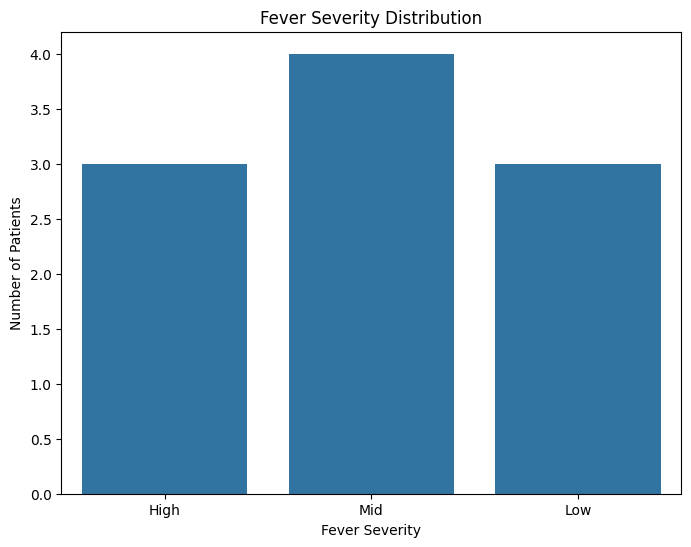

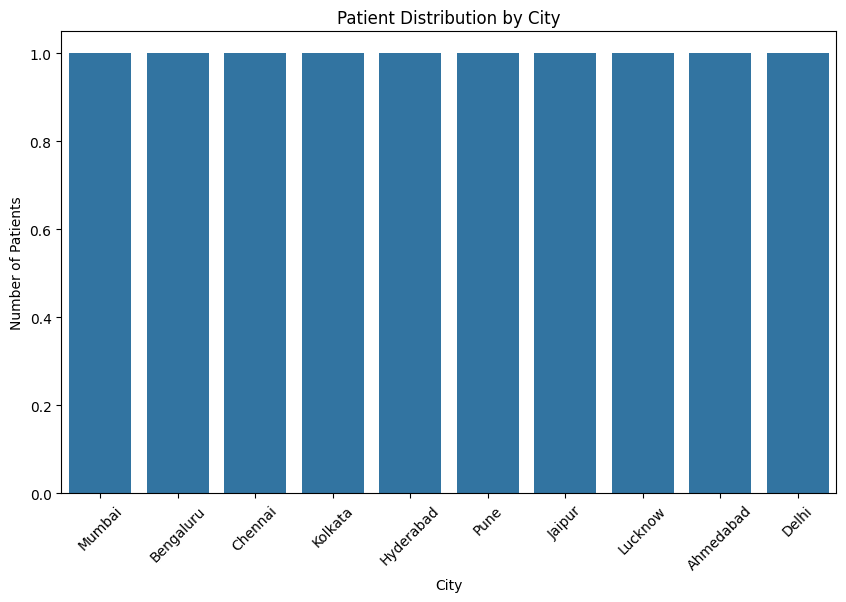

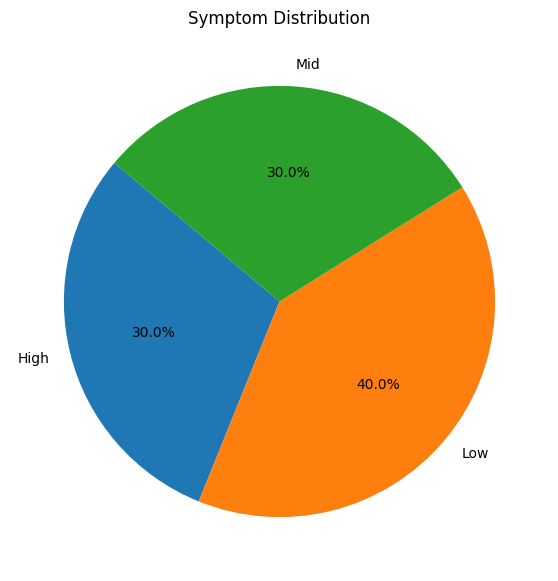

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Bar chart for Fever severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Fever', data=df)
plt.title('Fever Severity Distribution')
plt.xlabel('Fever Severity')
plt.ylabel('Number of Patients')
plt.show()

# Example 2: Bar chart for patient distribution by city
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Patient Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

# Example 3: Pie chart for symptom distribution (Fever, Cough, Cold)
symptom_counts = df[['Fever', 'Cough', 'Cold']].apply(pd.Series.value_counts).sum(axis=1)
plt.figure(figsize=(7, 7))
plt.pie(symptom_counts, labels=symptom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Symptom Distribution')
plt.show()
